#Ejercicio Unidad 1 Aprende y Mejora.
# Estudiante: Leonardo Torres Velilla

Tomaremos en cuenta el caso presentado por el profesor, realizando un analisis exploratorio de datos, donde se identificaran columnas, tipo de datos, medidas estadisticas, outliers, graficos.

In [116]:
"""Primero importamos las librerias necesarias para el analisis exploratorio de datos
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
"""
Importamos el dataset que para este ejercicio es un .CSV
"""
df_base = pd.read_csv("/content/credit_approval.csv", header=None)

#1. CREACIÓN DE NOMBRES A LAS COLUMNAS

In [118]:
df_base.columns = ['Sexo', 'Edad', 'Deuda', 'Casado', 'Cliente_bancario', 'Nivel_educativo',
    'Etnia', 'Años_empleo', 'Incumplimiento_previo', 'Empleado', 'Calificación_crediticia',
    'Licencia_conducir', 'Ciudadanía', 'Código_postal', 'Ingresos', 'Aprobado']

In [119]:
#Vizualizacion del dataset
df_base.head()

,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos,Aprobado
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [120]:
#Ver información del dataset
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sexo                     690 non-null    object 
 1   Edad                     690 non-null    object 
 2   Deuda                    690 non-null    float64
 3   Casado                   690 non-null    object 
 4   Cliente_bancario         690 non-null    object 
 5   Nivel_educativo          690 non-null    object 
 6   Etnia                    690 non-null    object 
 7   Años_empleo              690 non-null    float64
 8   Incumplimiento_previo    690 non-null    object 
 9   Empleado                 690 non-null    object 
 10  Calificación_crediticia  690 non-null    int64  
 11  Licencia_conducir        690 non-null    object 
 12  Ciudadanía               690 non-null    object 
 13  Código_postal            690 non-null    object 
 14  Ingresos                 6

In [121]:
#Resumen estadistico
df_base.describe(include='all')

,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos,Aprobado
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


Según como nos indica el diccionario de datos se cambiará la columna Aprobado a tipo numérico, reemplazando el "+" por "1" y el "-" por "0".

In [122]:
df_base['Aprobado'] = df_base['Aprobado'].replace({'+': 1, '-': 0}).astype(int)

/tmp/ipython-input-122-3247391404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_base['Aprobado'] = df_base['Aprobado'].replace({'+': 1, '-': 0}).astype(int)


#2. ANALÍSIS DE LOS DATOS

Total de registros: 690
Total de columnas: 16

Tipos de datos
Numéricos: Edad, Deuda, Años_empleo, Calificación_crediticia, Ingresos.

Categóricos (object): Sexo, Casado, Cliente_bancario, etc.

Como punto importante a resaltar, la variable Edad aparece como (Object), esto debido a que contiene valores no numéricos como '?'


#3. LIMPIEZA INICIAL

  a. Tal como se ve en la descripcion de los valores en las columnas, se observa que hay valores en '?', motivo por el cual seran reemplazados por valores nulos.

  b. Convertir columnas numéricas a su tipo correcto.

  c. Identificar valores nulos.

  d. Eliminar duplicados nulos en caso de que existan.

In [123]:
#cambiar los '?' por NaN
df_base = df_base.replace('?', np.nan)
df_base.describe(include='all')


,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos,Aprobado
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690.000000
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,NaN
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,NaN
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,NaN
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,0.444928
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,0.497318
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,0.000000
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,1.000000


In [124]:
#Conversion de variable Edad
df_base['Edad'] = pd.to_numeric(df_base['Edad'], errors='coerce')

#Verificar valores nulos y duplicados
print(df_base.isnull().sum())
print(df_base.duplicated().sum())

Sexo                       12
Edad                       12
Deuda                       0
Casado                      6
Cliente_bancario            6
Nivel_educativo             9
Etnia                       9
Años_empleo                 0
Incumplimiento_previo       0
Empleado                    0
Calificación_crediticia     0
Licencia_conducir           0
Ciudadanía                  0
Código_postal              13
Ingresos                    0
Aprobado                    0
dtype: int64
0


tal como observamos, las columnas que mas se ven afectadas son Sexo, Edad y Código_postal.

No se encontraron filas duplicadas.

#4. MANEJO DE VALORES FALTANTES.

En este paso tomaremos la variables de valores Numéricos que habíamos mencionado anteriormente y llenaremos los valores faltantes con la **media**. De igual manera las variables categóricas serán reemplazadas por la **moda**.

Luego volveremos a verificar si quedaron valores nulos.

In [125]:
#Valores numéricos con la media
col_num = ["Edad"]
for col in col_num:
    df_base[col].fillna(df_base[col].mean(), inplace=True)

/tmp/ipython-input-125-3592870640.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_base[col].fillna(df_base[col].mean(), inplace=True)


In [126]:
#Valores categóricas con la moda
col_cat = ["Sexo", "Casado", "Cliente_bancario", "Nivel_educativo", "Etnia", "Empleado", "Ciudadanía", "Código_postal"]
for col in col_cat:
    df_base[col].fillna(df_base[col].mode()[0], inplace=True)



/tmp/ipython-input-126-3290906951.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_base[col].fillna(df_base[col].mode()[0], inplace=True)


In [127]:
# Verificación que no queden nulos
print("\nValores nulos después de limpieza:")
print(df_base.isnull().sum())


Valores nulos después de limpieza:
Sexo                       0
Edad                       0
Deuda                      0
Casado                     0
Cliente_bancario           0
Nivel_educativo            0
Etnia                      0
Años_empleo                0
Incumplimiento_previo      0
Empleado                   0
Calificación_crediticia    0
Licencia_conducir          0
Ciudadanía                 0
Código_postal              0
Ingresos                   0
Aprobado                   0
dtype: int64


En conclusión podemos inferir que nuestra base ya no contiene valores nulos motivo por el cual podemos pasar a nuestro siguiente punto.

#5. ANALÍSIS DE ESTADÍSTICAS DESCRIPTTIVAS

- En este punto vamos a calcular la **media**, **mediana**, **desviasión estándar**, **mínimos**, **máximos**, **percentiles**.
- Distribución de variables numéricas.
- Detección y tratamiento de Outliers; en esta parte tomaremos la referencia indicada en la pagina del diccionario de datos, la cual será:

Si un outlier es extremo, lo eliminamos, para esto tomaremos como referencia (fuera de 3 desviaciones estándar), una regla de la estadística basada en la distribución normal; la regla a usar será la regla empírica del 68-95-99.7% para distribuciones normales y su uso para detección de valores atípicos.
 > Regla empirica para la distribución normal (2025, Abril 10).

Por consiguiente si no lo es será reemplazado por la media para los valores numéricos y con la moda para los categóricos.




In [128]:
# ANALISIS DESCRIPTIVOS

print(" Estadísticas descriptivas:\n")
print(df_base[["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]].describe())

print("\n Medianas:\n")
print(df_base[["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]].median())

print("\n Desviación estándar:\n")
print(df_base[["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]].std())


 Estadísticas descriptivas:

             Edad       Deuda  Años_empleo  Calificación_crediticia  \
count  690.000000  690.000000   690.000000                690.00000   
mean    31.568171    4.758725     2.223406                  2.40000   
std     11.853273    4.978163     3.346513                  4.86294   
min     13.750000    0.000000     0.000000                  0.00000   
25%     22.670000    1.000000     0.165000                  0.00000   
50%     28.625000    2.750000     1.000000                  0.00000   
75%     37.707500    7.207500     2.625000                  3.00000   
max     80.250000   28.000000    28.500000                 67.00000   

            Ingresos  
count     690.000000  
mean     1017.385507  
std      5210.102598  
min         0.000000  
25%         0.000000  
50%         5.000000  
75%       395.500000  
max    100000.000000  

 Medianas:

Edad                       28.625
Deuda                       2.750
Años_empleo                 1.000
Calificac

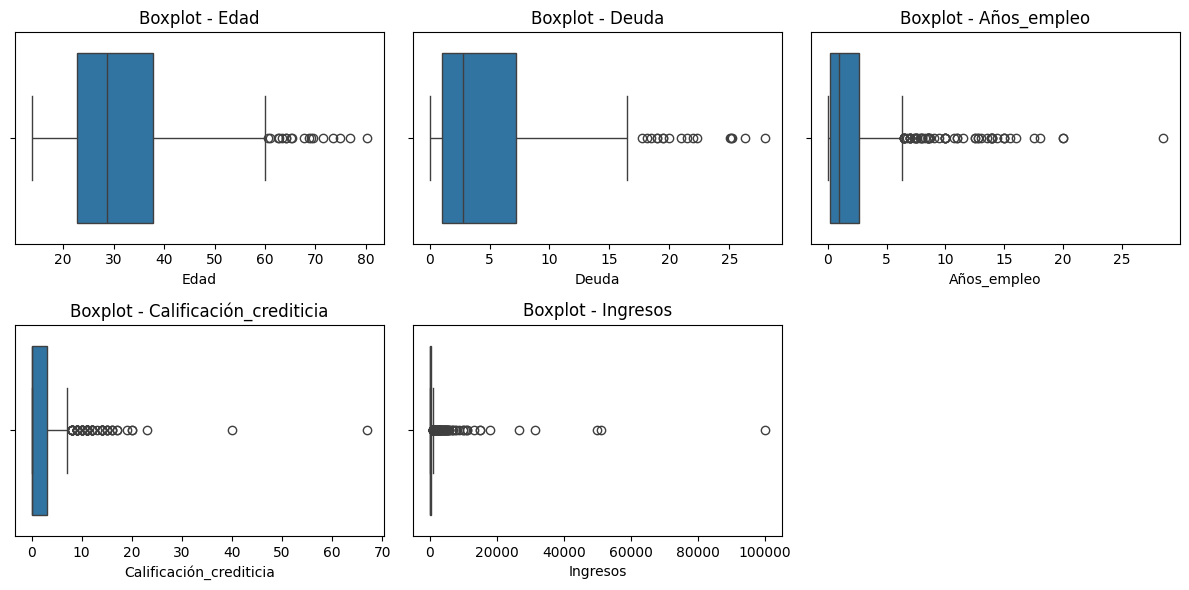

In [129]:
# Gráfico de cajas para vizualizar los Outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_base[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

Podemos analizar según el resultado de los gráficos que todas las variables presentan outliers; sus distribuciones son asimétricas.

#Tratamiento para Outliers Numéricos



In [130]:

def tratar_outliers(df_base, columnas):
    for col in columnas:
        media = df_base[col].mean()
        std = df_base[col].std()

        lim_inf = media - 3 * std
        lim_sup = media + 3 * std

        extremos = df_base[(df_base[col] < lim_inf) | (df_base[col] > lim_sup)]
        df_base[col] = df_base[col].apply(lambda x: media if x < lim_inf or x > lim_sup else x)
        print(f"Outliers tratados en '{col}': {len(extremos)}")
    return df_base

# Aplicar la función a las variables numéricas
df_base = tratar_outliers(df_base, ["Edad", "Deuda", "Años_empleo", "Calificación_crediticia", "Ingresos"])


Outliers tratados en 'Edad': 9
Outliers tratados en 'Deuda': 10
Outliers tratados en 'Años_empleo': 22
Outliers tratados en 'Calificación_crediticia': 8
Outliers tratados en 'Ingresos': 6


  Definimos un método para reemplazar o eliminar los outliers numéricos, teniendo en cuenta la regla empirica para la distribución normal, comentada arriba anteriormente.
  
  La función calcula la media y la desviasión estandar. Se crearon 2 variables las cuales son las encargadas de establecer nuestro límite inferior (-3), como nuestro límite superior (+3), luego identificamos los valores extremos de la columna y los guardamos para contarlos e informar cuántos se reemplazarán.

  La función **lambda**, para este caso se definió que para cada valor **x** en la columna, Si **x** es menor que el límite inferior o mayor que el límite superior (outlier extremo), este reemplaza **x** por la media; Si no, deja a **x** sin cambios.

  Para finalmente aplicar esta función a toda la columna con **apply()**.
  Como resultado tenemos la cantidad de Outliers tratados por columna.

#Tratamiento Para Outliers Categóricos

In [131]:
for col in col_cat:
    moda = df_base[col].mode()[0]
    freqs = df_base[col].value_counts()
    categorias_raras = freqs[freqs < 0.01 * len(df_base)].index
    df_base[col] = df_base[col].apply(lambda x: moda if x in categorias_raras else x)
    if len(categorias_raras) > 0:
      print(f"Categorías poco frecuentes reemplazadas en '{col}': {list(categorias_raras)}")


Categorías poco frecuentes reemplazadas en 'Casado': ['l']
Categorías poco frecuentes reemplazadas en 'Cliente_bancario': ['gg']
Categorías poco frecuentes reemplazadas en 'Nivel_educativo': ['r']
Categorías poco frecuentes reemplazadas en 'Etnia': ['dd', 'n', 'o']
Categorías poco frecuentes reemplazadas en 'Código_postal': ['00380', '00440', '00040', '00144', '00132', '00520', '00070', '00420', '00108', '00232', '00176', '00272', '00150', '00181', '00460', '00480', '00096', '00128', '00216', '00164', '00290', '00500', '00168', '00145', '00210', '00312', '00252', '00560', '00130', '00330', '00225', '00092', '00720', '00110', '00352', '00050', '00370', '00112', '00350', '00399', '00396', '00020', '00129', '00154', '00136', '00228', '00088', '00073', '00455', '00491', '00030', '00583', '00434', '00202', '00043', '00052', '00094', '00443', '00980', '00515', '00250', '00311', '00239', '00711', '00408', '00075', '00152', '00329', '00212', '00410', '00274', '00510', '00431', '00102', '00029'

Para tratar estos outliers utilicé un ciclo **for** teniendo en cuenta que ya se tenía una variable anteriormente llamada **col_cat** y reemplaza las categorías poco frecuentes por la **moda** de cada columna. Se creó variable **freqs** para contar la frecuencia de cada categoría en la columna. Se definen como **(categorias_raras)** todas aquellas cuya frecuencia representa menos del 1% del total de registros.

Nuevamente usé la función **lambda** para cada valor **x** de la columna, indicandole que si **x** pertenece a las **categorias_raras**, lo reemplaza por la **moda**; si no, deja el valor **x** tal como está.

Para finalmente con **len** indicarle que si encuentra una categoría rara indique cual fue y que columna se reemplazó.

#6. GRÁFICOS Y ANALISIS

En este apartado se realizarán gráficos exploratorios para tener un analísis más formal y ayudar en la toma de desiciones ante alguna problemática con respecto a estos datos.

Text(0.5, 1.0, 'Distribución de Edad')

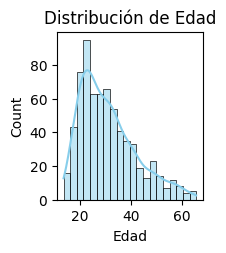

In [132]:
# Gráfico 1: Histograma de Edad
plt.subplot(2, 3, 1)
sns.histplot(df_base['Edad'], kde=True, bins=20, color='skyblue')
plt.title("Distribución de Edad")

Este gráfico nos muestra la istribución por edad de la base, la cual se ve ligeramente sesgada hacía la derecha, indicando una distribución unimodal, y concluyendo que la mayoría de los solicitantes se encuentran entre los 20 y 40 años.

Text(0.5, 1.0, 'Edad vs Ingresos según Aprobación')

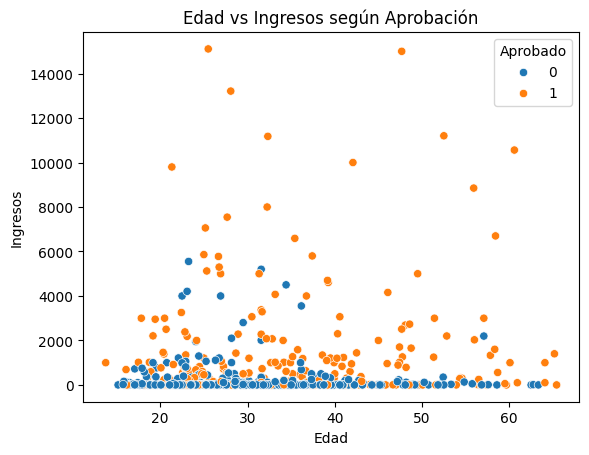

In [133]:
# Gráfico 2: Scatterplot Edad vs Ingresos (coloreado por aprobación)

sns.scatterplot(x='Edad', y='Ingresos', hue='Aprobado', data=df_base)
plt.title("Edad vs Ingresos según Aprobación")

Para este gráfico se está comparando la edad vs los ingresos por aprobación, evidenciando que los ingresos altos se aprueban más, de la misma manera que no hay muchas aprobaciones con ingresos cercanos a cero.

Podemos concluir que entre estas dos variables hay una gran relación entre ingresos y la probabilidad de aprobación.

/tmp/ipython-input-134-2739141054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aprobado', data=df_base, palette='pastel')


Text(0.5, 1.0, 'Frecuencia de Aprobación')

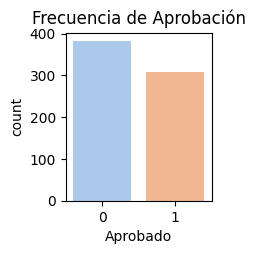

In [134]:
# Gráfico 3: Countplot de Aprobación
plt.subplot(2, 3, 4)
sns.countplot(x='Aprobado', data=df_base, palette='pastel')
plt.title("Frecuencia de Aprobación")

En este gráfico se busco saber la frecuencia en la que se aprueban los créditos, dando como resultado que más solicitudes son rechazadas que aprobadas.

Concluyendo que el sistema de crédito es exigente o el perfil general es riesgoso.

/tmp/ipython-input-135-2010424627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sexo', y='Edad', data=df_base, palette='cool')


Text(0.5, 1.0, 'Edad por Sexo')

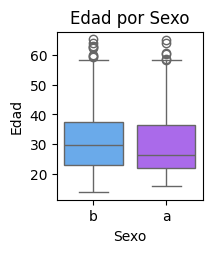

In [135]:
# Gráfico 4: Boxplot Edad según Sexo
plt.subplot(2, 3, 5)
sns.boxplot(x='Sexo', y='Edad', data=df_base, palette='cool')
plt.title("Edad por Sexo")

En este gráfico se buscó comparar variables categóricas (Sexo) con numéricas (Edad), dando como resultado que tanto hombres (b), como mujeres (a) tienen distribuciones de edades similares. Por lo que se puede concluir que no hay diferencias significativas por sexo en cuanto a edad.

Text(0.5, 1.0, 'Correlación entre variables numéricas')

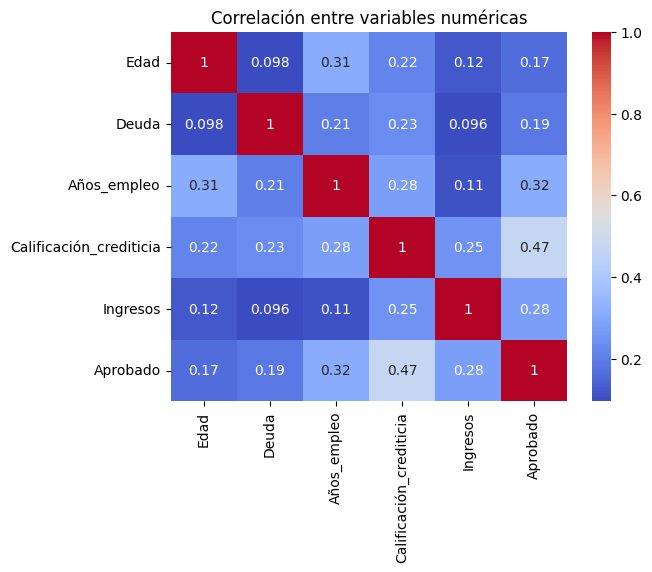

In [136]:
# Gráfico 6: Heatmap de Correlaciones
sns.heatmap(df_base.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación entre variables numéricas")

Para finalizar se realizó un mapa de correlación entre las variables numéricas del conjunto de datos. Se observa que todos los valores se encuentran positivos y van de 0.096 a 1, lo cual sugiere que no hay relaciones negativas entre las variables numéricas.

De este grafico se puede concluir diferentes aspectos como:
- La calificación crediticia es el predictor más fuerte del resultado (Aprobado), lo cual es coherente con prácticas estándar de análisis crediticio.
- Años de empleo e ingresos también influyen positivamente en la aprobación del crédito, aunque con menor intensidad.
- Variables como edad y deuda tienen correlaciones bajas, por lo que podrían no ser tan determinantes.
- Todas las correlaciones están por debajo de (0.5), lo que es positivo para futuros modelos predictivos.

#BIBLIOGRAFIAS

1. Regla empirica para la distribución normal. *https://builtin.com/data-science/empirical-rule*

2. Diccionario de datos. *https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html*

3. Función Lambda. *https://www.datacamp.com/es/tutorial/python-lambda-functions#:~:text=Las%20funciones%20lambda%20de%20Python%20son%20una%20potente%20herramienta%20para,consulta%20los%20recursos%20de%20DataCamp.*


#Ejercicio Unidad 2 Aprende y mejora

#Estudiante: Leonardo Torres Velilla

De acuerdo con la actividad establecida para la unidad 2 realizaremos en base al ejercicio pasado los puntos que nos indican.

1- Utilizar tres técnicas de agrupamiento, con el objetivo de describir el comportamiento financiero de los individuos que han solicitado un crédito. Identificar patrones y segmentos demográficos y crediticios para una mejor comprensión.

2- Aplicar tres técnicas de clasificación donde Y=A16. Buscar un modelo que permita proyectar si a un individuo se le otorgará o no un crédito financiero según sus variables de entrada.

3- Para cada método de agrupamiento y clasificación, explorar diversas configuraciones de los parámetros de los modelos. Evaluar el rendimiento mediante medidas de desempeño adecuadas para cada técnica utilizada.

Teniendo en cuenta lo realizado en la unidad anterior, tenemos como punto de partida:



*   Se aplicó limpieza en los valores faltantes.
*   Los outliers numéricos y categóricos fueron tratados.
*   La variable Aprobado se encuentra transformada.



In [137]:
df_base.to_csv("credit_data_limpio.csv", index=False)

#1 - TÉCNICAS DE AGRUPAMIENTO

las tecnicas elegidas para este punto fueron:
- Análisis de Componentes Principales (PCA)
- Clustering con K-means
- Clustering con DBSCAN

Antes de aplicar las tecnicas primero debemos tener en cuenta que debemos codificar nuestras variables categóricas, dado a que los algoritmos de **clustering** requieren variables númericas.

por lo cual usaremos **labelEncoder**, es una clase de la librería Scikit-learn que se utiliza para transformar etiquetas categóricas en valores numéricos enteros.

Los algoritmos de clustering como **K-Means** y **DBSCAN** no pueden trabajar con datos tipo texto, ya que requieren distancias numéricas entre observaciones.
LabelEncoder asigna un valor numérico distinto a cada categoría, por ejemplo:

* Sexo: ('b': 1, 'a': 0)
* Casado: ('u' : 1, 'y' : 0)

In [138]:
from sklearn.preprocessing import LabelEncoder

# Identificar columnas categóricas que son tipo objeto
cat_cols = df_base.select_dtypes(include='object').columns

# Aplicar clase LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df_base[col] = le.fit_transform(df_base[col])

El siguiente paso a seguir es un escalado de variables, esto con el fin de reducir aquellas variables como Ingresos o Calificación_crediticia que tienen rangos muy distintos.

El clustering calcula distancias euclidianas, por lo que sin escalado, las variables con mayor rango dominarían el resultado. para este paso se transformarán todos los datos para que tengan media 0 y desviación estándar 1.

In [139]:
from sklearn.preprocessing import StandardScaler

# Separar variables predictoras (sin 'Aprobado')
X = df_base.drop('Aprobado', axis=1)

# uso de Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [140]:
X.head(10)

,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos
0,1,30.83,0.000,0,0,11,4,1.250,1,1,1.0,0,0,0,0.000000
1,0,58.67,4.460,0,0,10,2,3.040,1,1,6.0,0,0,0,560.000000
2,0,24.50,0.500,0,0,10,2,1.500,1,0,0.0,0,0,12,824.000000
3,1,27.83,1.540,0,0,11,4,3.750,1,1,5.0,1,0,3,3.000000
4,1,20.17,5.625,0,0,11,4,1.710,1,0,0.0,0,2,4,0.000000
5,1,32.08,4.000,0,0,9,4,2.500,1,0,0.0,1,0,16,0.000000
6,1,33.17,1.040,0,0,1,2,6.500,1,0,0.0,1,0,0,1017.385507
7,0,22.92,11.585,0,0,2,4,0.040,1,0,0.0,0,0,2,1349.000000
8,1,54.42,0.500,1,1,8,2,3.960,1,0,0.0,0,0,7,314.000000
9,1,42.50,4.915,1,1,11,4,3.165,1,0,0.0,1,0,0,1442.000000


# 1.1 Técnica de agrupamiento 1
# Análisis de Componentes Principales (PCA)

Tambíen llamado Análisis de componentes es una técnica que se utiliza para reducir la dimensionalidad de los datos. El PCA crea nuevas variables, como componentes principales, que son combinaciones lineales de las variables originales.

In [141]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit_transform(X_scaled)


array([[ 0.82977435, -0.61865165, -0.60644402],
       [ 2.77549557,  0.26869456,  0.33379994],
       [-0.38119933, -1.14959175, -0.61371329],
       ...,
       [-0.75033861,  2.39862896, -0.62189308],
       [-1.97238565, -1.71457517, -1.02556663],
       [ 0.21196419, -0.11047406,  2.54318303]])

Este código aplica Análisis de Componentes Principales (PCA) al conjunto de datos escalado (X_scaled) con el objetivo de reducir su dimensionalidad a 3 componentes principales.

In [142]:
data_pca = pca.fit_transform(X_scaled)

In [143]:
print(pca.explained_variance_ratio_)

[0.19743555 0.12251456 0.08953789]


Esto significa que las tres primeras componentes principales (PC) extraídas mediante PCA explican las siguientes proporciones de la varianza total del conjunto de datos:

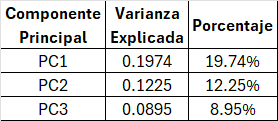

Esto evidencia que solo el 40.94% de la varianza total de los datos originales está contenida en estas 3 dimensiones.

In [144]:
print(pca.explained_variance_ratio_.cumsum())

[0.19743555 0.31995011 0.409488  ]


Esta parte nos da a entender que nuestra varianza acumulada es aproximadamente de un 40.95%.

In [145]:
print(pca.components_)

[[-0.06015722  0.23403712  0.23842136 -0.29658095 -0.29658095  0.09543276
  -0.06673351  0.27942633  0.38914424  0.40763547  0.43426891  0.04474991
  -0.14583279 -0.1957936   0.22227986]
 [ 0.06975359  0.12723905  0.09493236  0.62585186  0.62585186 -0.01085943
  -0.13000364  0.21106432  0.16573406  0.12673822  0.16543721  0.06997122
  -0.17532265 -0.10518936  0.08594043]
 [ 0.30534574  0.46164592 -0.03944104 -0.07023446 -0.07023446  0.02106063
  -0.31077519  0.40002548  0.02316722 -0.30934975 -0.17916845  0.35679281
   0.37635871 -0.06091075 -0.15552519]]


#1.2 Tenica de agrupamiento 2
#K- Means

Esta técnica busca k grupos distintos en los datos, cada grupo se representa por un centroide y Asigna cada observación al grupo cuyo centroide esté más cercano.

Para aplicar los k-means, primero utilizamos el método del codo, esto con el fin de identificar el número óptimo de clusters para la técnica.

A continuación, gráficaremos y buscaremos identificar el punto donde la disminución de la inercia comienza a volverse menos pronunciada

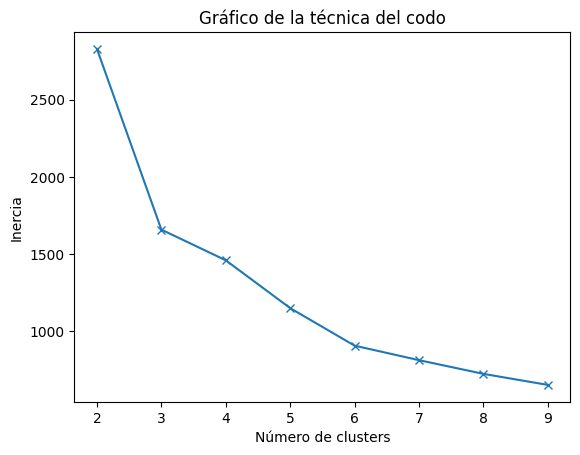

In [146]:
inercia = []

for i in range(2,10):
  cluster = KMeans(n_clusters=i,random_state=42)
  cluster.fit(data_pca)
  inercia.append(cluster.inertia_)

plt.plot(range(2,10),inercia, marker='x')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Gráfico de la técnica del codo')
plt.show()

Tal como se evidencia en la gráfica, podemos concluir que el número óptimo de clústeres sugerido por este gráfico es 3.

Esto significa que, según la distribución y compactación de los datos financieros se identifican naturalmente 3 segmentos o grupos de individuos.

In [147]:
from sklearn.cluster import KMeans

grupos = KMeans(n_clusters=3, random_state=42)
grupos.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [148]:
print(grupos.labels_)

[1 1 0 1 0 0 0 0 2 2 0 0 0 0 1 2 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 0 1 2 1 2 1 0 0 0 0 0 0 0 2 0 0 0 1 1 1 2 1 1 1 1 1 1 1 0 0 0 0
 2 0 0 2 2 0 1 0 0 0 0 0 0 2 0 0 2 0 2 2 2 0 2 0 2 1 2 2 1 1 2 1 0 2 2 1 1
 2 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1 2 1 0 0 1 1 2 2 0 1 1 0 2 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 0 2 2 2 2 1 2 1 1 0 1 1 2 1 0 1 1 1 1 2 1 1 2 0 1 1 1 2 1 1
 0 0 0 0 0 2 1 0 1 1 1 1 1 1 0 1 0 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0
 2 0 2 0 2 0 2 2 0 0 0 0 0 2 2 0 0 0 2 2 0 2 2 0 0 1 0 0 0 2 2 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 2 2 0 0 0 2 0 2 2 0 2 2 0 2 0
 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 1 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2
 2 0 0 0 0 2 0 2 0 0 0 0 2 2 0 2 2 0 0 0 0 0 0 0 2 0 2 2 2 0 2 0 0 0 2 0 2
 2 0 0 0 0 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 2 0 0 1 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 2 0
 2 1 2 0 2 2 2 2 0 1 1 1 

In [149]:
data_final = pd.DataFrame(data_pca, columns=['PCA1','PCA2','PCA3'])

In [150]:
data_final['grupos'] = grupos.labels_

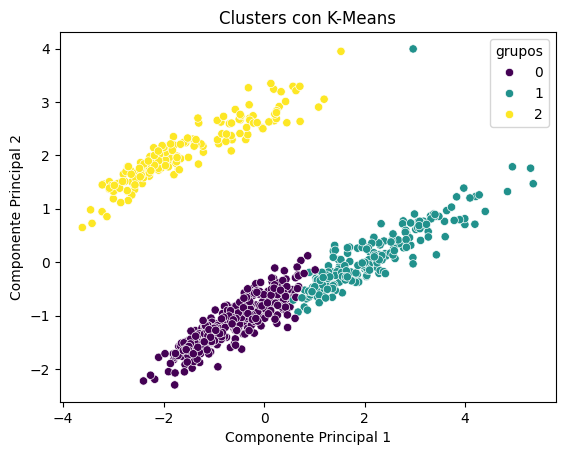

In [151]:
sns.scatterplot(data=data_final,x='PCA1',y='PCA2',hue='grupos',palette='viridis')
plt.title('Clusters con K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Este gráfico muestra el resultado visual del algoritmo de agrupamiento K-Means, aplicado sobre los datos de solicitantes de crédito después de haberlos reducido a dos componentes principales mediante Análisis de Componentes Principales (PCA).

Cada punto es un individuo (solicitante de crédito).

El color representa a qué grupo (clúster) pertenece según el algoritmo K-Means.

- Grupo 0 (púrpura)
- Grupo 1 (verde azulado)
- Grupo 2 (amarillo)

El algoritmo detectó patrones en los datos y agrupó a los solicitantes en 3 grupos distintos, basados en similitud de características.

Las agrupaciones están bien separadas en el plano, lo que indica que:

El clustering fue exitoso.

Hay diferencias claras entre los perfiles de cada grupo.

Por ejemplo, un grupo puede tener personas con alta deuda e ingresos bajos; otro, personas con buena calificación crediticia y años de empleo estables.

En conclusión, este gráfico te permite validar visualmente que K-Means fue efectivo al separar los datos en grupos significativos. No es el análisis final, pero sí ayuda a identificar patrones y caracterizar los grupos después.

In [152]:
#Añadí al dataset la columna llamada grupos
df_base['grupos'] = grupos.labels_
df_base.head()

,Sexo,Edad,Deuda,Casado,Cliente_bancario,Nivel_educativo,Etnia,Años_empleo,Incumplimiento_previo,Empleado,Calificación_crediticia,Licencia_conducir,Ciudadanía,Código_postal,Ingresos,Aprobado,grupos
0,1,30.83,0.000,0,0,11,4,1.25,1,1,1.0,0,0,0,0.0,1,1
1,0,58.67,4.460,0,0,10,2,3.04,1,1,6.0,0,0,0,560.0,1,1
2,0,24.50,0.500,0,0,10,2,1.50,1,0,0.0,0,0,12,824.0,1,0
3,1,27.83,1.540,0,0,11,4,3.75,1,1,5.0,1,0,3,3.0,1,1
4,1,20.17,5.625,0,0,11,4,1.71,1,0,0.0,0,2,4,0.0,1,0


In [153]:
# Agrupamiento por grupos para las primeras 5 filas
data_segmentada = df_base.groupby('grupos')

for label, data in data_segmentada:
  print(f'grupos:{label}')
  print(data.head(5))
  print('/n')

grupos:0
   Sexo   Edad   Deuda  Casado  Cliente_bancario  Nivel_educativo  Etnia  \
2     0  24.50   0.500       0                 0               10      2   
4     1  20.17   5.625       0                 0               11      4   
5     1  32.08   4.000       0                 0                9      4   
6     1  33.17   1.040       0                 0                1      2   
7     0  22.92  11.585       0                 0                2      4   

   Años_empleo  Incumplimiento_previo  Empleado  Calificación_crediticia  \
2         1.50                      1         0                      0.0   
4         1.71                      1         0                      0.0   
5         2.50                      1         0                      0.0   
6         6.50                      1         0                      0.0   
7         0.04                      1         0                      0.0   

   Licencia_conducir  Ciudadanía  Código_postal     Ingresos  Aprobado  grupo

Tomando en cuenta está agrupación se observa:

**Grupo 0** Jóvenes en situación vulnerable (Edad entre 20 y 33 años)

Este grupo representa jóvenes sin empleo ni historial bancario, con historial de incumplimiento y alta deuda.

La aprobación de crédito en todos los casos es sorprendente, lo que sugiere que podrían estar accediendo a microcréditos o subsidios sin evaluación exhaustiva.

Potencialmente alto riesgo crediticio para entidades financieras tradicionales.

**Grupo 1** Adultos con empleo y calificación intermedia (Edad entre 27 y 58 años)

Tienen mejor perfil que el grupo 0, especialmente por el empleo y calificación. A pesar de algunos ingresos bajos, parecen estar siendo aprobados por tener empleo y mejor historial crediticio.

Este grupo es moderado en riesgo, y podría beneficiarse de programas de inclusión con educación financiera.

**Grupo 2** Clientes formales pero con señales mixtas (Mayores de 36 años y mayores de 50 años)

Este grupo es el más estable formalmente, pero con gran heterogeneidad. Algunos podrían ser clientes tradicionales en proceso de caída financiera, y otros con mal historial a pesar de estar bancarizados.

Se recomienda segmentarlos internamente con un análisis más fino ya sea por calificación o ingresos.

#1.3 Tenica de agrupamiento 3
#Clustering con DBSCAN

es un algoritmo de clustering que agrupa puntos de datos en función de su densidad. A diferencia de otros algoritmos, DBSCAN no requiere especificar el número de clusters de antemano y es capaz de identificar ruido (puntos que no pertenecen a ningún cluster).

A continuación, se agruparán los datos según densidad, sin especificar el número de clústeres.

In [154]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

Este algoritmo,

- Detecta grupos densos de puntos.
- No requiere definir cuántos grupos hay.
- Puntos aislados se consideran ruido (-1).

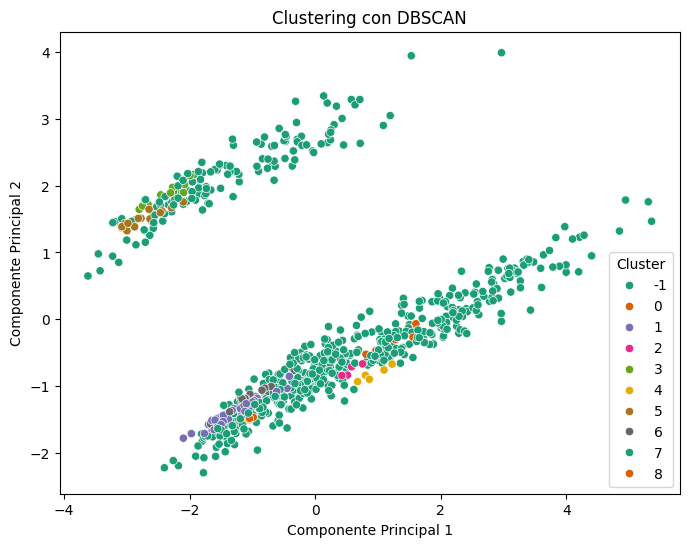

In [155]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=dbscan_labels, palette='Dark2')
plt.title("Clustering con DBSCAN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()

Interpretación del gráfico:

- Eje X: Componente Principal 1
- Eje Y: Componente Principal 2

Estos componentes son combinaciones lineales de las variables originales y retienen la mayor varianza posible. No son interpretables directamente como variables originales, pero sí reflejan la estructura global de los datos.

Se identificaron 9 clusters válidos (0 a 8), el color de cada punto indica a qué cluster pertenece.

Los puntos identificados como -1 (ruido), aparecen en verde oscuro, estos representan outliers o puntos que no pertenecen a ningún grupo denso. Su presencia es útil para entender casos atípicos (posibles fraudes, errores de registro, comportamientos financieros muy distintos).

Para la Distribución, se identifica que hay dos regiones principales de densidad alta, visibles como agrupaciones al norte y al sur del gráfico.

Los clusters están embebidos dentro de estas regiones, lo que sugiere que dentro de patrones similares hay subgrupos con características distintas.

Para concluir teniendo en cuenta el análisis financiero para el estudio crediticio podriamos inferir que para los clústers válidos (0 a 8), los subgrupos de clientes con comportamientos financieros similares por ejemplo, clientes con ingresos estables, clientes nuevos, de alto riesgo, etc.. Se deben analizar sus características originales tales como la edad, ingresos, historial, entre otras, con el fin de tener una mejor interpretación.

por el contrario para los puntos (-1) se infiere que son individuos anómalos, que se salen del patrón de todos los grupos, podrían representar clientes con comportamiento inusual como: muy alta deuda, ingresos nulos, historial errático o extremadamente bueno.

#2. TÉCNICAS DE CLASIFICACIÓN

Las técnicas usadas para este punto fueron las siguientes:
- Regresión Logística.
- Naive Bayes (GaussianNB)
- Árbol de Desición
- K Vecinos más cercanos (KNN)

Tal como el ejercicio indica tomaremos en cuenta las técnicas de clasificación utilizando la librería scikit-learn, con la variable: **Aprobado** como variable objetivo (Y), y dividiendo el conjunto en entrenamiento y prueba con train_test_split.

para este apartado tomaremos la transformación de datos previamente realizada para las técnicas de agrupamiento, dado a que los datos procesados deben estar sin nulos, sin variables categóricas sin codificar, y con el X_escalado anteriormente realizado. Es necesario también que Aprobado esté en formato numérico, el cual ya se encuentra transformado.

In [156]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (Y)
X = df_base.drop(columns=['Aprobado'])
Y = df_base['Aprobado']

# Dividir el conjunto en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 2.1 Técnica 1
# Regresión Logística


In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)
Y_pred_log = log_model.predict(X_test)

print("Regresión Logística:")
print(confusion_matrix(Y_test, Y_pred_log))
print(classification_report(Y_test, Y_pred_log))

Regresión Logística:
[[86 24]
 [14 83]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       110
           1       0.78      0.86      0.81        97

    accuracy                           0.82       207
   macro avg       0.82      0.82      0.82       207
weighted avg       0.82      0.82      0.82       207



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


De acuerdo a los resultados podemos deducir que esta técnica presenta un buen equilibrio entre precisión y recall.

Especialmente fuerte en el recall para los aprobados (1), lo cual significa que identifica correctamente la mayoría de los individuos a los que se les aprueba el crédito.

Es un modelo lineal, útil cuando los datos tienen separación clara entre clases.

tiene como ventaja:
- Fácil de interpretar
- rápido y eficiente.

# 2.2 Técnica 2
# Naive Bayes (GaussianNB)

In [158]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
Y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes:")
print(confusion_matrix(Y_test, Y_pred_nb))
print(classification_report(Y_test, Y_pred_nb))

Naive Bayes:
[[96 14]
 [28 69]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       110
           1       0.83      0.71      0.77        97

    accuracy                           0.80       207
   macro avg       0.80      0.79      0.79       207
weighted avg       0.80      0.80      0.80       207



De acuerdo a los resultados podemos deducir que esta técnica presenta alta precisión en clase 1: cuando predice *aprobado*, suele acertar.

Sin embargo, su recall es más bajo que en Regresión Logística: se le escapan más casos que deberían ser aprobados.

Naive Bayes asume independencia entre variables, lo que rara vez se cumple en problemas financieros.

Puede ser útil cuando el objetivo es minimizar falsos positivos para evitar dar crédito a quien no lo merece, aunque corre el riesgo de no aprobar a clientes buenos.

# 2.3 Técnica 3
# Árbol de Decisión (Decision Tree)

In [159]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, Y_train)
Y_pred_tree = tree_model.predict(X_test)

print("Árbol de Decisión:")
print(confusion_matrix(Y_test, Y_pred_tree))
print(classification_report(Y_test, Y_pred_tree))

Árbol de Decisión:
[[92 18]
 [22 75]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.81      0.77      0.79        97

    accuracy                           0.81       207
   macro avg       0.81      0.80      0.81       207
weighted avg       0.81      0.81      0.81       207



De acuerdo a los resultados podemos deducir que esta técnica ofrece un rendimiento equilibrado.

Tiene mejor precisión que Naive Bayes y una ligera desventaja en recall respecto a Regresión Logística.

Fácil de interpretar visualmente puesto que puede convertirse en reglas lógicas.

Como una Ventaja clave:
- Puede modelar relaciones no lineales entre variables sin requerir normalización.

# 2.4 Técnica 4
# K Vecinos más Cercanos (KNN)

In [160]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar k
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)

print("K Vecinos (KNN):")
print(confusion_matrix(Y_test, Y_pred_knn))
print(classification_report(Y_test, Y_pred_knn))

K Vecinos (KNN):
[[80 30]
 [41 56]]
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       110
           1       0.65      0.58      0.61        97

    accuracy                           0.66       207
   macro avg       0.66      0.65      0.65       207
weighted avg       0.66      0.66      0.65       207



De acuerdo a los resultados podemos deducir que esta técnica ofrece un rendimiento claramente inferior en todas las métricas.

Tiene bajo recall y precisión indica que confunde mucho ambas clases. Es altamente sensible a la escala de los datos y al ruido.

En este caso, no parece una buena técnica para clasificación crediticia, al menos sin ajuste de hiperparámetros o ingeniería de características más profunda.

# CONCLUSIONES GENERALES

De acuerdo con el siguiente cuadro comparativo, se podrá observar una comparativa entre las diferentes técnicas de clasificación que se hicieron:

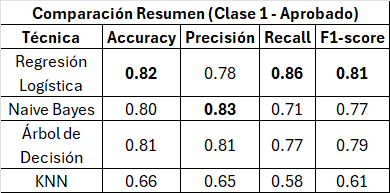

Por lo cual podemos indducir que la mejor técnica para este caso es la **Regresión Logística**, porque:

1. Tiene la mayor capacidad de detección correcta de aprobaciones (recall = 0.86), lo cual es fundamental para no perder clientes viables.

2. Ofrece buen balance general de métricas.

3. Es robusta y fácil de interpretar, ideal para justificar decisiones en entornos financieros donde la trazabilidad es clave.

Con respecto a las demás técnicas, Naive Bayes y Árbol de Decisión son opciones razonables, pero con desventajas comparativas claras frente a la regresión logística. Y por último KNN queda descartado, debido a ser la que menos opción para calificación crediticia tiene.

#BIBLIOGRAFIAS

*LabelEncoder.* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

*StandarScaler.* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

*Análisis de Componentes Principales (PCA).* https://www.ibm.com/es-es/think/topics/principal-component-analysis#:~:text=El%20PCA%20se%20utiliza%20para,los%20objetivos%20de%20su%20an%C3%A1lisis.

*Método del codo.* https://www.ibm.com/mx-es/think/topics/k-means-clustering#:~:text=El%20m%C3%A9todo%20del%20codo&text=Mide%20la%20distancia%20euclidiana%20entre,funci%C3%B3n%20del%20n%C3%BAmero%20de%20cl%C3%BAsteres.&text=El%20primer%20paso%20del%20m%C3%A9todo,el%20n%C3%BAmero%20%C3%B3ptimo%20de%20cl%C3%BAsteres.&text=A%20la%20hora%20de%20decidir,el%20an%C3%A1lisis%20de%20la%20silueta.

*Machine Learning & Clustering: el algoritmo DBSCAN.* https://datascientest.com/es/machine-learning-clustering-dbscan

*Algoritmo de clasificación: definición y modelos principales.* https://datascientest.com/es/algoritmo-de-clasificacion#:~:text=Clasificaci%C3%B3n%20supervisada,en%20lugar%20de%20una%20categor%C3%ADa.

*Machine learning: Diferencias entre algoritmos de clasificación y regresión.* https://theblackboxlab.com/machine-learning-diferencias-entre-algoritmos-clasificacion-regresion/
